In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

1.Data 

In [3]:
#Create known parameters
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
#Creating train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
#Create function to visualize the training set
def plot_predictions(train_data=X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions=None):
    plt.figure(figsize=(10,7))
    #Plot training data
    plt.scatter(train_data, train_labels, label="Training Data")
    #Plot test data
    plt.scatter(test_data, test_labels,c='g',s=4,label="Testing Data")
    if predictions is not None:
        #Plot the predictions
        plt.scatter(test_data, predictions,c='r',s=4,label="Predictions")
    
    plt.legend()


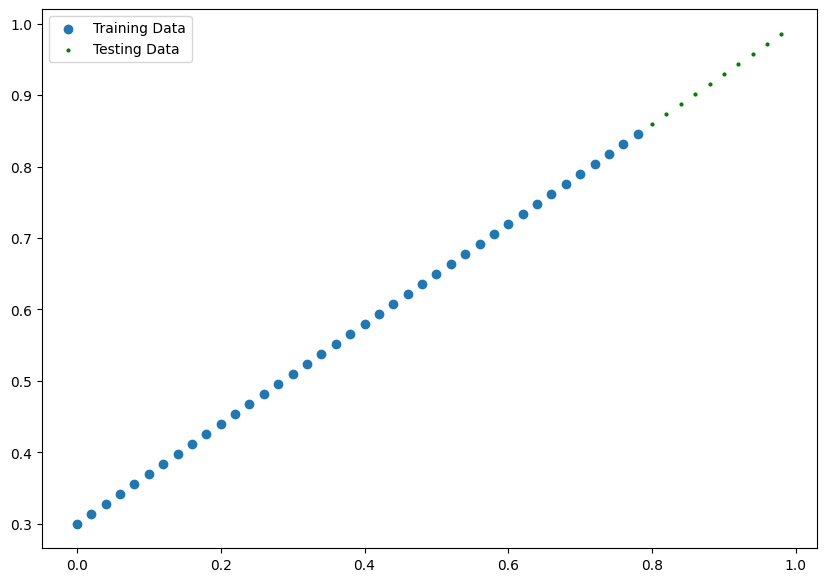

In [6]:
plot_predictions()

Build the model

In [7]:
#nn.Module are the lego blocks 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


Checking the contens of a PyTorch model

In [8]:
#Set manual seed
torch.manual_seed(3)

#Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8033], requires_grad=True),
 Parameter containing:
 tensor([0.1748], requires_grad=True)]

In [9]:
#Get the state of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.8033])), ('bias', tensor([0.1748]))])

Making predictions using torch.inference_mode()

In [10]:
#Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [11]:
y_preds

tensor([[0.8175],
        [0.8335],
        [0.8496],
        [0.8657],
        [0.8817],
        [0.8978],
        [0.9138],
        [0.9299],
        [0.9460],
        [0.9620]])

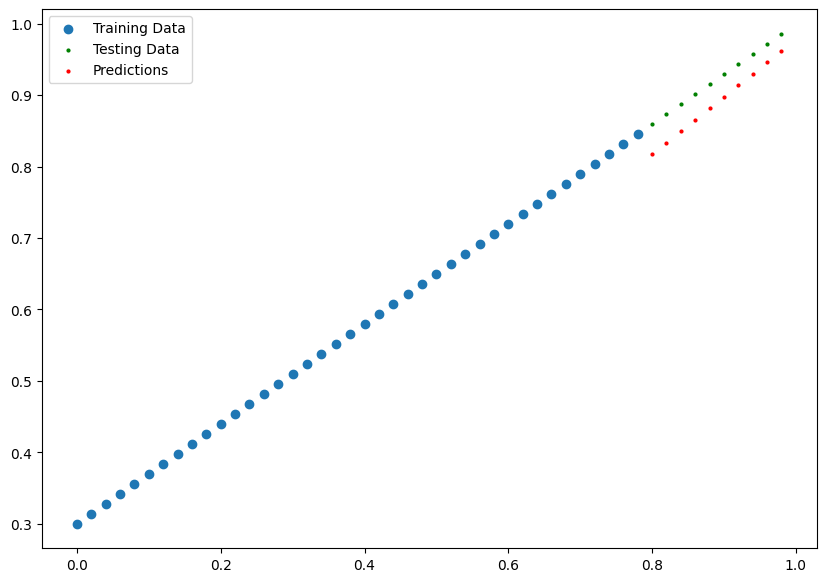

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test-y_preds

tensor([[0.0425],
        [0.0405],
        [0.0384],
        [0.0363],
        [0.0343],
        [0.0322],
        [0.0302],
        [0.0281],
        [0.0260],
        [0.0240]])

Train the model

Creating a loss function and optimizer in PyTorch

In [14]:
#Create the loss function
loss_fn = nn.L1Loss()
#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

Creating an testing loop

In [18]:
torch.manual_seed(3)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #Put model in training mode
    model_0.train()

    #Forward pass on the train data
    y_pred = model_0(X_train)
    
    #Calculate the loss
    loss = loss_fn(y_pred, y_train)

    #Zero grad of the optimizer
    optimizer.zero_grad()

    #Loss backwards
    loss.backward()

    #Progress the optimizer
    optimizer.step()

    #Testing
    #Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
        #Forward pass on test data
        test_pred = model_0(X_test)

        #Calculate loss on test data
        test_loss = loss_fn(test_pred,y_test.type(torch.float))

        if epoch % 10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train loss: {loss}| MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train loss: 0.07336794584989548| MAE Test Loss: 0.007339787669479847
Epoch: 10 | MAE Train loss: 0.02467980980873108| MAE Test Loss: 0.05235721543431282
Epoch: 20 | MAE Train loss: 0.02099081501364708| MAE Test Loss: 0.0482238344848156
Epoch: 30 | MAE Train loss: 0.017552001401782036| MAE Test Loss: 0.03995128720998764
Epoch: 40 | MAE Train loss: 0.014123055152595043| MAE Test Loss: 0.03236562758684158
Epoch: 50 | MAE Train loss: 0.010687190108001232| MAE Test Loss: 0.024093085899949074
Epoch: 60 | MAE Train loss: 0.007249563932418823| MAE Test Loss: 0.016507422551512718
Epoch: 70 | MAE Train loss: 0.0038211264181882143| MAE Test Loss: 0.008234882727265358
Epoch: 80 | MAE Train loss: 0.004499685950577259| MAE Test Loss: 0.011109143495559692
Epoch: 90 | MAE Train loss: 0.004499685950577259| MAE Test Loss: 0.011109143495559692


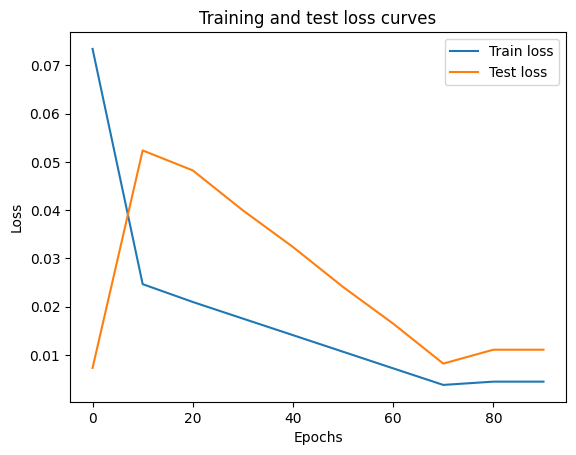

In [20]:
#Plot the loss curves
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.7043]), 'bias': tensor([0.2938])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Inference